# Imports de modules

In [3]:
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# scipy.stats.wilcoxon(x, y=None, zero_method='wilcox', correction=False)

In [5]:
# scipy.stats.mannwhitneyu(x, y, use_continuity=True, alternative=None)

# Liste des mesures (quantitatives et qualitatives)

In [6]:
m_quanti = [
 'Toni_diaph',
 'Endu_exten',
 'Endu_flech',
 'Bernem',
 'Incli_D',
 'Incli_G',
 'Rota_D',
 'Rota_G',
 'Flexi',
 'Exten']
m_quali = [
 'Type_respi',
 'Type_diagh',
]

# Acquisition et mise en forme des données

In [7]:
df = pd.read_csv('Data_DB_Organized.csv', sep = ';') #, encoding = "utf8")
# df = pd.read_csv('D0.csv', sep = '\t') #, encoding = "utf8")
print(df.head(2))
# df.dtypes
print(df.columns)

  Patient Groupe  EVA_Pr  EVA_Mi  EVA_Po1  EVA_Po2  age  Taille  Poids  \
0      FL     KT       5       3        0        1   22     159   50.0   
1      BL     KT       5       2        0        0   21     168   62.0   

         BMI  ... Rota_G_Po2 Rota_D_Po2 Flexi_Pr Flexi_Mi Flexi_Po1 Flexi_Po2  \
0  19.777699  ...         82         81       77       78        82        79   
1  21.967120  ...         94         90       63       98        80        88   

  Exten_Pr Exten_Mi  Exten_Po1  Exten_Po2  
0       68       70         70         71  
1       47       57         65         69  

[2 rows x 62 columns]
Index(['Patient', 'Groupe', 'EVA_Pr', 'EVA_Mi', 'EVA_Po1', 'EVA_Po2', 'age',
       'Taille', 'Poids', 'BMI', 'Type_respi_Pr', 'Type_respi_Mi',
       'Type_respi_Po1', 'Type_respi_Po2', 'Type_diaph_Pr', 'Type_diaph_Mi',
       'Type_diaph_Po1', 'Type_diaph_Po2', 'Toni_diaph_Pr', 'Toni_diaph_Mi',
       'Toni_diaph_Po1', 'Toni_diaph_Po2', 'Toni_diaph_init_Pr',
       'Toni_di

# Analyse données brutes

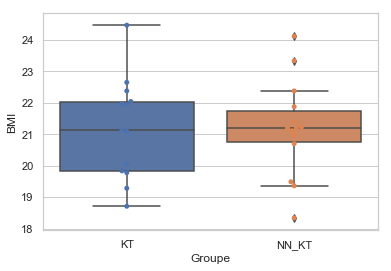

In [8]:
sns.set(style="whitegrid")
# tips = sns.load_dataset("tips")
val = 'BMI'
ax = sns.boxplot(data = df, x = "Groupe", y = val)
ax = sns.swarmplot(data = df, x = "Groupe", y = val)

# Test de Mann-Whitney
## "2 échantillons proviennent-ils de la même population ?"

In [9]:
#  scipy.stats.mannwhitneyu(x, y, use_continuity=True, alternative=None)

In [10]:
df_KT = df[ df['Groupe'] == 'KT']
df_NN_KT = df[ df['Groupe'] == 'NN_KT']

In [11]:
dic = {}
for test in ['_Pr', '_Po1']:
    U_stats = []
    pvalues = []
    for m in m_quanti:
        U_stat, pvalue = stats.mannwhitneyu(x = df_KT[m + test], y = df_NN_KT[m + test])#, use_continuity=True, alternative=None)
        U_stats.append(U_stat)
        pvalues.append(round(pvalue, 3))
    dic.update({'U_stat' + test : U_stats, 'pvalue' + test : pvalues})
u_df = pd.DataFrame(dic, index = m_quanti)
u_df
# u_df[['pvalue_Pr', 'pvalue_Po1']]

,U_stat_Pr,pvalue_Pr,U_stat_Po1,pvalue_Po1
Toni_diaph,78.5,0.172,54.5,0.015
Endu_exten,74.5,0.219,75.0,0.226
Endu_flech,68.5,0.142,51.5,0.029
Bernem,63.5,0.094,45.5,0.014
Incli_D,71.5,0.177,76.0,0.239
Incli_G,65.0,0.107,66.0,0.117
Rota_D,89.0,0.471,82.0,0.339
Rota_G,77.0,0.256,76.0,0.240
Flexi,74.0,0.211,85.5,0.404
Exten,89.0,0.471,88.0,0.452


# Test de WilCoxon
## "Une même population a-t-elle évolué ?"

In [12]:
stats.wilcoxon(x, y = None, zero_method='wilcox', correction=False)

NameError: name 'x' is not defined

In [54]:
dic = {}
for groupe in ['KT', 'NN_KT']:
    df_gr = df[ df['Groupe'] == groupe]

    for test in ['_Mi', '_Po1', '_Po2']:
        Ts = []
        pvalues = []
        for m in m_quanti:
    #         U_stat, pvalue = stats.mannwhitneyu(x = df_KT[m + test], y = df_NN_KT[m + test])#, use_continuity=True, alternative=None)
            T, pvalue = stats.wilcoxon(x = df_gr[m + test], y = df_gr[m + '_Pr']) # zero_method='wilcox', correction=False)
            Ts.append(T)
            pvalues.append(round(pvalue, 3))
        dic.update({'T' + test : Ts, 'pvalue' + test : pvalues})
    u_df = pd.DataFrame(dic, index = m_quanti)
    print(u_df)
    # u_df[['pvalue_Pr', 'pvalue_Po1']]

            T_Mi  pvalue_Mi  T_Po1  pvalue_Po1  T_Po2  pvalue_Po2
Toni_diaph   0.0      0.083    0.0       0.002    0.0       0.002
Endu_exten   6.5      0.006    3.0       0.003    2.0       0.002
Endu_flech  17.5      0.050    5.0       0.005    5.0       0.005
Bernem       0.0      0.001    0.0       0.001    0.0       0.001
Incli_D     19.5      0.068    4.5       0.011    7.5       0.008
Incli_G     34.0      0.419   25.0       0.151   17.5       0.050
Rota_D      17.0      0.046    9.0       0.011    6.0       0.006
Rota_G       8.5      0.010    4.5       0.007    6.0       0.009
Flexi       34.0      0.419   17.5       0.090   27.5       0.208
Exten       28.5      0.235   20.5       0.080   23.0       0.115
            T_Mi  pvalue_Mi  T_Po1  pvalue_Po1  T_Po2  pvalue_Po2
Toni_diaph   0.0        NaN    0.0       0.004    0.0       0.005
Endu_exten  22.0      0.055   15.0       0.019   15.0       0.019
Endu_flech  30.0      0.157   13.5       0.014   17.5       0.028
Bernem    

C:\Users\marti\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
C:\Users\marti\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
C:\Users\marti\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2803: RuntimeWarning: invalid value encountered in double_scalars
  z = (T - mn - correction) / se
C:\Users\marti\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\marti\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\marti\Anaconda3\lib\site-packages\sci

In [52]:
# df['diff'] = df['R1_0'] - df['R1_1']

In [53]:
# stats.wilcoxon(x = df['diff'], zero_method='wilcox', correction=False)

In [15]:
https://pythonfordatascience.org/wilcoxon-sign-ranked-test-python/

SyntaxError: invalid syntax (<ipython-input-15-a54614e9dfe9>, line 1)

# Evolutions des mesures
## "Comment évoluent les grandeurs mesurées au cours des tests ?""

In [47]:
df.head()

,Patient,Groupe,EVA_Pr,EVA_Mi,EVA_Po1,EVA_Po2,age,Taille,Poids,BMI,...,Rota_G_Po2,Rota_D_Po2,Flexi_Pr,Flexi_Mi,Flexi_Po1,Flexi_Po2,Exten_Pr,Exten_Mi,Exten_Po1,Exten_Po2
0,FL,KT,5,3,0,1,22,159,50.0,19.777699,...,82,81,77,78,82,79,68,70,70,71
1,BL,KT,5,2,0,0,21,168,62.0,21.967120,...,94,90,63,98,80,88,47,57,65,69
2,BN,KT,3,3,1,1,22,173,60.0,20.047446,...,89,91,70,59,65,69,85,80,81,82
3,GC,KT,4,2,1,0,24,174,64.0,21.138856,...,91,93,83,85,86,78,68,69,70,71
4,DA,KT,8,5,3,3,25,165,60.0,22.038567,...,78,80,53,42,47,51,52,44,66,69


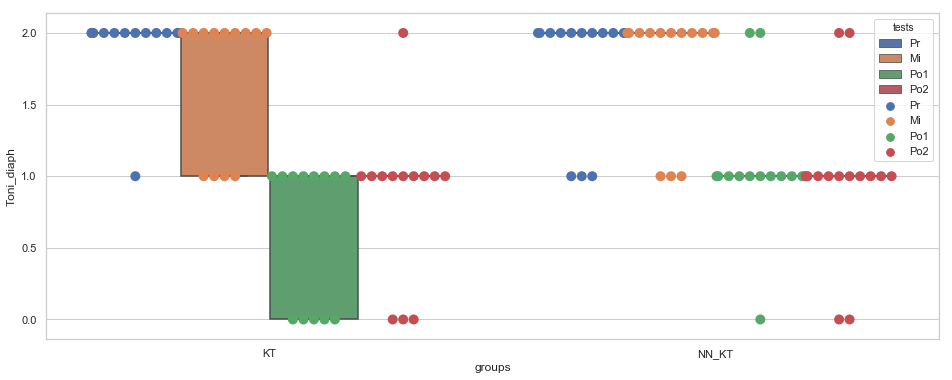

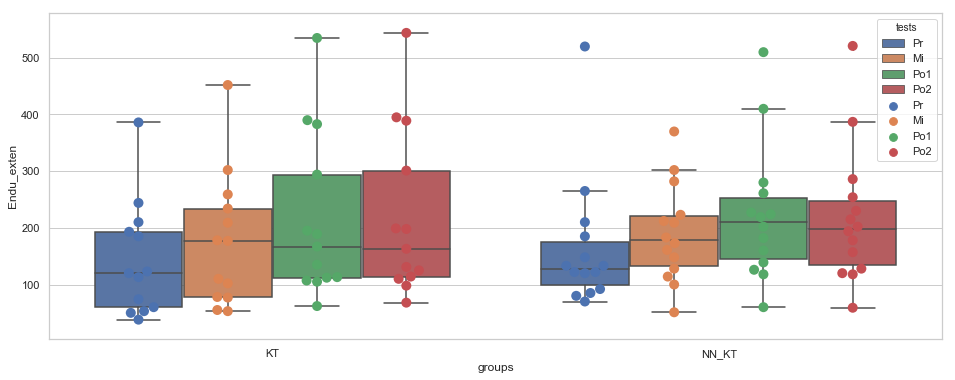

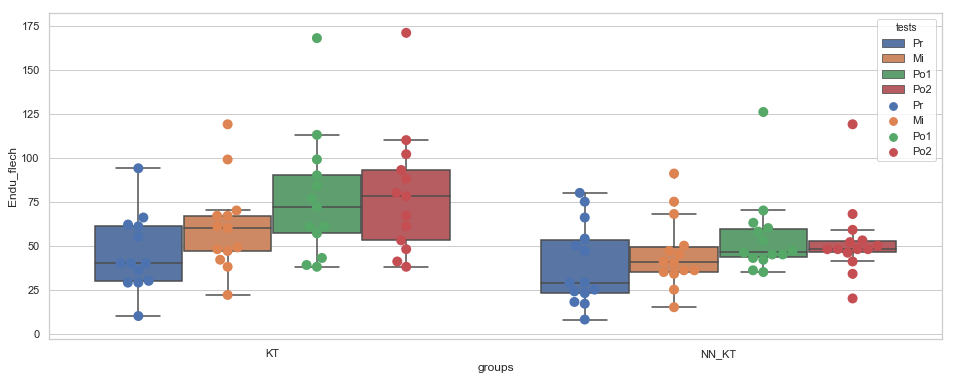

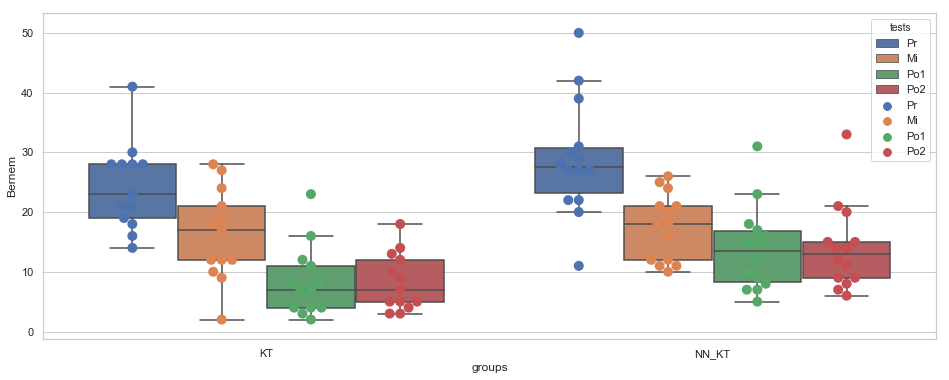

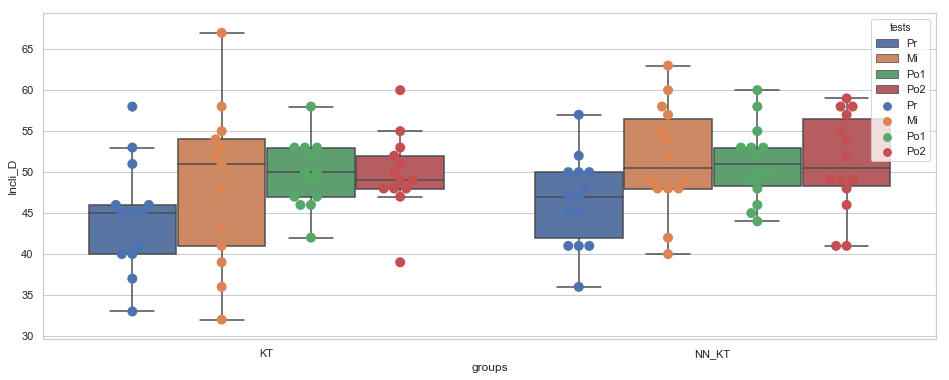

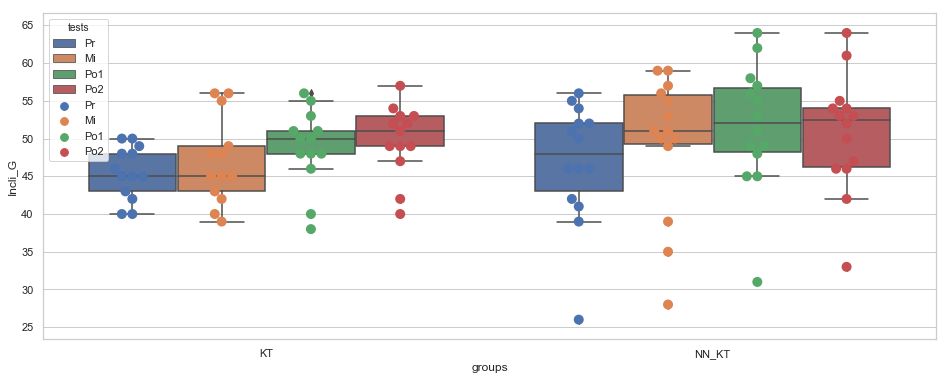

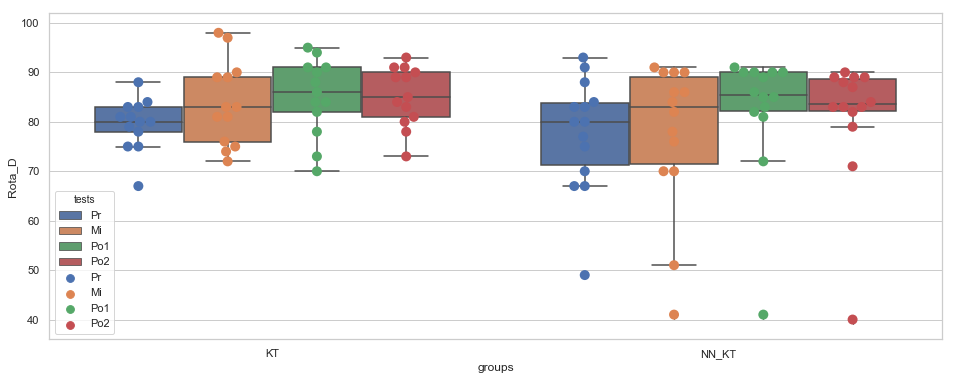

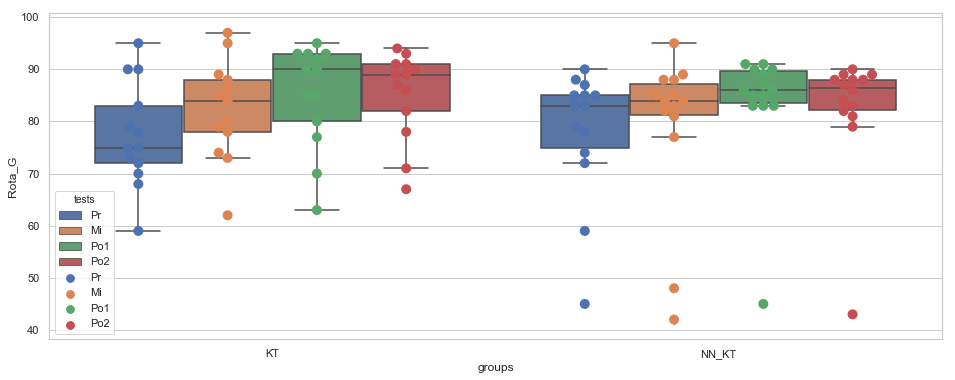

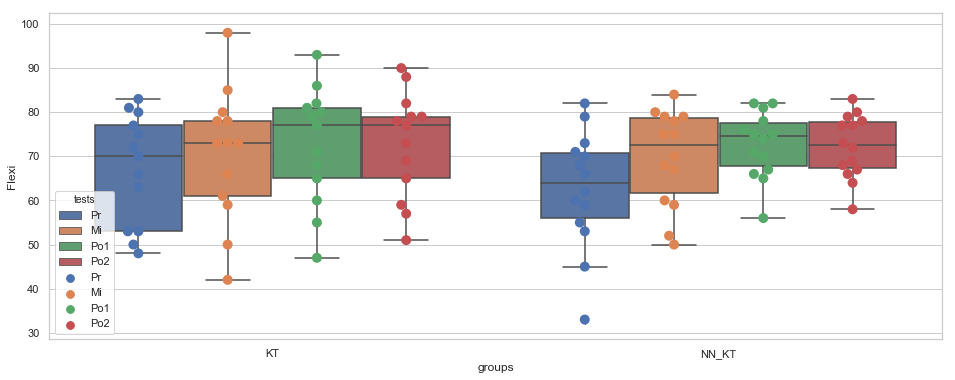

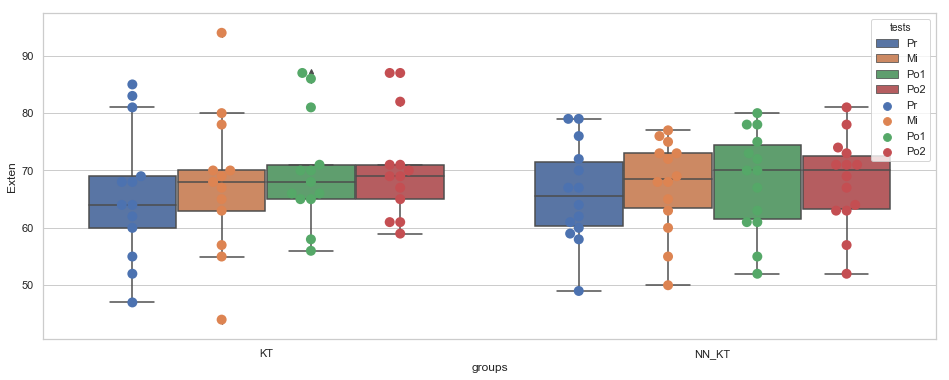

In [83]:
for m in m_quanti[:]:
#     print(m_quanti)
#     vals = []
#     tests = []
#     groups = []
    dic_m = {m : [], 'tests' : [], 'groups' : []}
    for test in ['Pr', 'Mi', 'Po1', 'Po2']:
#         print(test)
#         print(m)
#         print(m + '_' + test)
        for i, serie in df.iterrows():
#             print(serie['Patient'])
            dic_m[m].append(serie[m + '_' + test])
            dic_m['tests'].append(test)
            dic_m['groups'].append(serie['Groupe'])
#     print('dic_m',dic_m)
    
    df_m = pd.DataFrame(dic_m)
#     print(df_m[ df_m['tests'] == 'Po1' ])
#     print(df_m)
#     ax = sns.swarmplot(data = df_m, x = "groups", y = 'vals', hue = "tests")
    plt.figure(figsize=(16, 6))
    ax = sns.boxplot(data = df_m, x = "groups", y = m, hue = "tests")
    ax = sns.swarmplot(data = df_m, x = "groups", y = m, hue = "tests", dodge=True, size=10, edgecolor='gray')